# 🧠 Perceptron: Pierwszy Neuron (Początki Deep Learning)

Każda, nawet najbardziej skomplikowana sieć neuronowa (jak GPT-4), składa się z milionów małych klocków zwanych **Neuronami**.

Jak działa biologiczny neuron?
1.  Odbiera sygnały od kolegów (Wejście).
2.  Jeśli sygnał jest wystarczająco silny, "odpala" impuls dalej (Aktywacja).

Matematyczny neuron (**Perceptron**) robi to samo:
$$ Wynik = (Wejście \times Waga) + Bias $$

Jeśli wynik przekroczy próg -> Zwróć 1.
W przeciwnym razie -> Zwróć 0.

W tym notatniku nauczymy neuron logiki **AND** (czyli: "Zwróć prawdę tylko wtedy, gdy oba wejścia są prawdziwe").

--- DANE TRENINGOWE (Bramka AND) ---
Wejście: [0 0] -> Oczekiwane: 0
Wejście: [0 1] -> Oczekiwane: 0
Wejście: [1 0] -> Oczekiwane: 0
Wejście: [1 1] -> Oczekiwane: 1


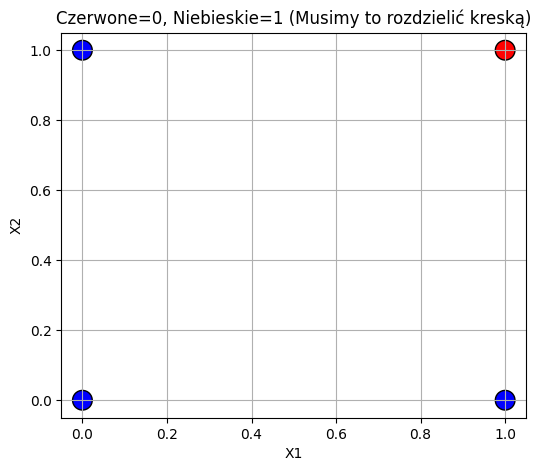

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. DANE (Logika AND)
# X = [Wejście 1, Wejście 2]
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# y = Oczekiwany wynik (Tylko 1 i 1 daje 1)
y = np.array([0, 0, 0, 1])

print("--- DANE TRENINGOWE (Bramka AND) ---")
for i in range(len(X)):
    print(f"Wejście: {X[i]} -> Oczekiwane: {y[i]}")

# Wizualizacja problemu
plt.figure(figsize=(6, 5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=200, edgecolor='k')
plt.title("Czerwone=0, Niebieskie=1 (Musimy to rozdzielić kreską)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

## Budujemy Mózg od Zera

Napiszemy klasę `Perceptron`. Będzie miała dwie metody:
1.  `predict()`: Policz sumę ważoną i powiedz 0 lub 1.
2.  `train()`: Jeśli się pomyliłeś, popraw wagi (używając logiki Gradient Descent).

Wzór na aktualizację wagi:
$$ NowaWaga = StaraWaga + (LearningRate \times Błąd \times Wejście) $$

In [2]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs
        # Inicjalizujemy wagi jako zera (plus jeden dla Biasu)
        self.weights = np.zeros(input_size + 1)
        
    def predict(self, x):
        # Matematyka: (x1*w1 + x2*w2) + bias
        # Dodajemy 1 na początku wektora x dla biasu
        summation = np.dot(x, self.weights[1:]) + self.weights[0]
        
        # Funkcja aktywacji (Schodek / Step Function)
        return 1 if summation > 0 else 0

    def train(self, X, y):
        print(f"Start treningu (Wagi początkowe: {self.weights})")
        
        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                # 1. Co myśli neuron teraz?
                prediction = self.predict(xi)
                
                # 2. Jaki był błąd? (np. Oczekiwano 1, wyszło 0 -> Błąd = 1)
                update = self.lr * (target - prediction)
                
                # 3. Aktualizacja wag (Uczenie się)
                self.weights[1:] += update * xi
                self.weights[0]  += update # Aktualizacja biasu
                
                errors += int(update != 0.0)
            
            # Wypisz postęp co epokę
            print(f"Epoka {epoch+1}: Błędy = {errors}, Wagi = {self.weights}")
            
            # Jeśli brak błędów, przerywamy wcześniej
            if errors == 0:
                print("--- Sukces! Nauczył się idealnie. ---")
                break

# URUCHAMIAMY TRENING
p = Perceptron(input_size=2)
p.train(X, y)

Start treningu (Wagi początkowe: [0. 0. 0.])
Epoka 1: Błędy = 1, Wagi = [0.1 0.1 0.1]
Epoka 2: Błędy = 3, Wagi = [0.  0.2 0.1]
Epoka 3: Błędy = 3, Wagi = [-0.1  0.2  0.1]
Epoka 4: Błędy = 2, Wagi = [-0.1  0.2  0.2]
Epoka 5: Błędy = 1, Wagi = [-0.2  0.2  0.1]
Epoka 6: Błędy = 0, Wagi = [-0.2  0.2  0.1]
--- Sukces! Nauczył się idealnie. ---


## Co tu się wydarzyło?

Neuron startował z wagami `[0, 0, 0]`. Był głupi.
W każdej pętli sprawdzał: "Czy dobrze zgadłem?".
Jeśli się pomylił, przesuwał wagi (zgodnie z wzorem).
Po kilku epokach znalazł liczby, które idealnie oddzielają zera od jedynek!

Zobaczmy tę "kreskę", którą narysował neuron.

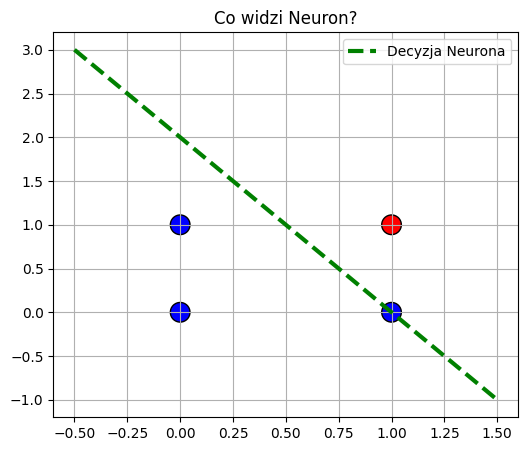

In [3]:
# Wizualizacja Granicy Decyzyjnej
plt.figure(figsize=(6, 5))

# Punkty danych
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=200, edgecolor='k')

# Rysujemy linię, którą wymyślił neuron
# Równanie prostej: w1*x1 + w2*x2 + b = 0  =>  x2 = -(w1*x1 + b) / w2
x_vals = np.linspace(-0.5, 1.5, 100)
slope = -(p.weights[1] / p.weights[2])
intercept = -(p.weights[0] / p.weights[2])
decision_boundary = slope * x_vals + intercept

plt.plot(x_vals, decision_boundary, 'g--', linewidth=3, label='Decyzja Neurona')
plt.title("Co widzi Neuron?")
plt.legend()
plt.grid()
plt.show()

## 🧠 Podsumowanie: Śmierć i Odrodzenie AI

Mamy sukces! Neuron nauczył się logiki AND.
Ale...

**Tu jest haczyk (Problem XOR).**
Nasz neuron działa tak, że rysuje **prostą kreskę** na wykresie. Wszystko nad kreską to 1, pod kreską to 0.
A co, jeśli mamy problem **XOR** (Alternatywa wykluczająca)?
*   (0,0) -> 0
*   (1,1) -> 0
*   (0,1) -> 1
*   (1,0) -> 1

Spróbuj narysować te punkty na kartce. Nie da się ich rozdzielić jedną prostą linią!
W latach 60. naukowcy (Minsky i Papert) udowodnili to matematycznie. To doprowadziło do **"Zimy AI"** – finansowanie badań wstrzymano na lata, bo uznano, że sieci neuronowe są bezużyteczne.

**Rozwiązanie:**
Okazało się, że wystarczy połączyć wiele neuronów warstwami.
Jeden neuron rysuje kreskę pionową, drugi poziomą, a trzeci łączy ich wyniki.
Tak powstały **Multi-Layer Perceptrons (MLP)**, czyli dzisiejsze **Deep Learning**.